# SVM with Concentric Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

This code loads, partitions, and plots the data.

In [2]:
points = pd.read_csv("./data/points.csv")
train_points, test_points = train_test_split(points, test_size=0.38, random_state=0)

In [3]:
def plotGroup(data, group, marker, legend=True):
    # Plot data by group
    sns.scatterplot(data=data, x="x", y="y", hue=group, marker=marker, palette="deep", s=50, legend=legend)
    
    # Format plot
    plt.xlim(-11, 11)
    plt.ylim(-11.5, 11)

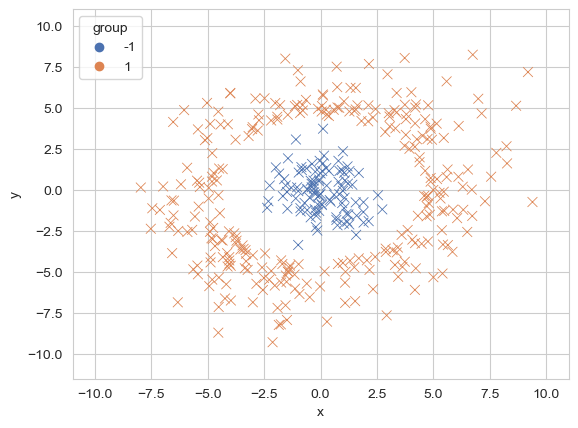

In [4]:
plotGroup(points, points.group, "x")

The training data set is in the train_points DataFrame with the response variable named "group".

In [5]:
classifier = SVC(gamma='auto')
classifier.fit(train_points.iloc[:, :-1], train_points.iloc[:, -1])
print("Accuracy:", classifier.score(test_points.iloc[:, :-1], test_points.iloc[:, -1]))

Accuracy: 1.0


Plot predicted groups.

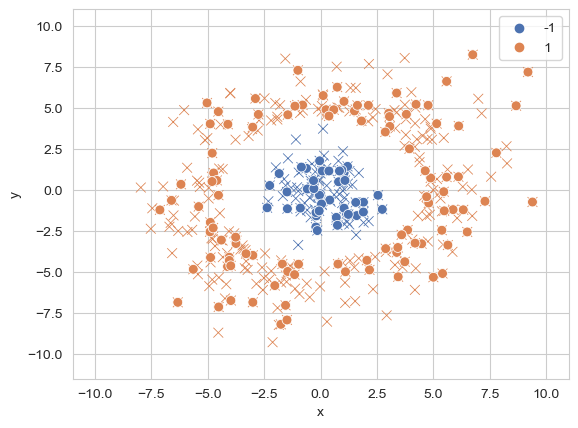

In [6]:
predictions = classifier.predict(test_points.iloc[:, :-1])

plt.figure()
plotGroup(points, points.group, "x", legend=False)
plotGroup(test_points, predictions, "o")
plt.show()